<a href="https://colab.research.google.com/github/HarmanBhutani/ML_projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:

# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:

# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [8]:
 # Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [9]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.154479, W: 0.261627, b: 0.727959
step: 100, loss: 0.154345, W: 0.260484, b: 0.736066
step: 150, loss: 0.154240, W: 0.259471, b: 0.743245
step: 200, loss: 0.154157, W: 0.258575, b: 0.749603
step: 250, loss: 0.154093, W: 0.257780, b: 0.755233
step: 300, loss: 0.154042, W: 0.257077, b: 0.760219
step: 350, loss: 0.154002, W: 0.256454, b: 0.764634
step: 400, loss: 0.153971, W: 0.255903, b: 0.768544
step: 450, loss: 0.153947, W: 0.255414, b: 0.772006
step: 500, loss: 0.153927, W: 0.254982, b: 0.775073
step: 550, loss: 0.153912, W: 0.254599, b: 0.777788
step: 600, loss: 0.153901, W: 0.254260, b: 0.780193
step: 650, loss: 0.153891, W: 0.253959, b: 0.782322
step: 700, loss: 0.153884, W: 0.253693, b: 0.784208
step: 750, loss: 0.153878, W: 0.253458, b: 0.785878
step: 800, loss: 0.153874, W: 0.253249, b: 0.787357
step: 850, loss: 0.153870, W: 0.253064, b: 0.788666
step: 900, loss: 0.153868, W: 0.252901, b: 0.789826
step: 950, loss: 0.153865, W: 0.252756, b: 0.790853
step: 1000, l

In [10]:
import matplotlib.pyplot as plt

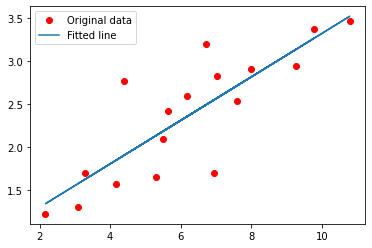

In [11]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()